# <유방암 분류 이미지>

## [배경] 


## [주제]


## [설명]




# [Dataset Info.]

### 1. train.csv [파일] 


### 2. test.csv [파일]


### 3. sample_submission.csv [제출양식]


### 결론



데이터를 확인한 결과는 다음과 같습니다.



# 1. Data Load & Data library Load

data_info에서 떠오르는 생각 & 도메인


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.5 MB/s eta 0:00:00


In [3]:
# 데이터분석 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rc("font", family="Malgun Gothic")
plt.rc('font', family='NanumBarunGothic') 

import warnings
warnings.filterwarnings('ignore')

In [4]:
# 유방암 데이터 불러오기
base_path = "/content/drive/MyDrive/Colab Notebooks/유방암 이미지 분류_프로젝트/"

train_df = pd.read_csv(base_path + "train_cancer.csv")
test_df = pd.read_csv(base_path + "test_cancer.csv")
# submission = pd.read_csv(base_path + "sample_submission.csv")
# data_info = pd.read_csv(base_path + "data_info.csv")

# EDA 

In [6]:
print("train.csv 내용")
display(train_df.head())

train.csv 내용


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


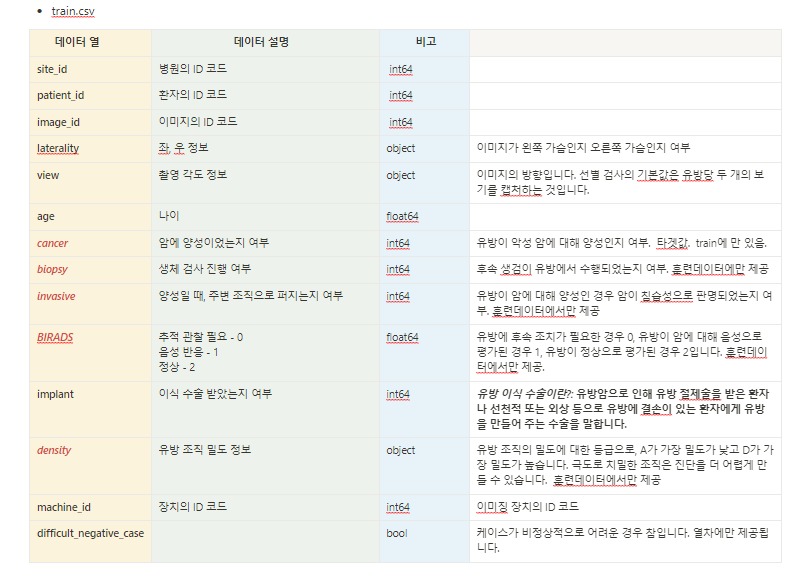

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [23]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
site_id,54706.0,1.460407e+00,4.984344e-01,1.0,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
patient_id,54706.0,3.269887e+04,1.889386e+04,5.0,1.648100e+04,3.243200e+04,4.899900e+04,6.553400e+04
image_id,54706.0,1.079386e+09,6.183269e+08,68491.0,5.458153e+08,1.082689e+09,1.613228e+09,2.147472e+09
age,54669.0,5.854393e+01,1.005088e+01,26.0,5.100000e+01,5.900000e+01,6.600000e+01,8.900000e+01
cancer,54706.0,2.116770e-02,1.439444e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
biopsy,54706.0,5.427193e-02,2.265556e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
invasive,54706.0,1.495266e-02,1.213645e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
BIRADS,26286.0,7.723503e-01,5.900624e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
implant,54706.0,2.699887e-02,1.620815e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
machine_id,54706.0,5.461838e+01,4.478480e+01,21.0,2.900000e+01,4.900000e+01,4.900000e+01,2.160000e+02


대체적로 이상치는 많지는 않다. 하지만 시각화로 살펴봐야 한다.

#  EDA : 결측치 설정


In [41]:
train_df.isna().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

In [18]:
test_df.isna().sum()

site_id          0
patient_id       0
image_id         0
laterality       0
view             0
age              0
implant          0
machine_id       0
prediction_id    0
dtype: int64

In [20]:
# 중간값 찾기

age_median_list = list(set(train_df["age"].to_list()))

def finding(x):

    n=len(x)
    
    if n%2==1:
        result=x[int((n-1)/2)]

    else:
        result=(x[int(n/2)-1]+x[int(n/2)])/2

    return result

result = finding(age_median_list)

print(f"median : {int(result)}")

median : 60


In [7]:
train_df["age"] = train_df["age"].fillna(60)

In [8]:
train_df["BIRADS"] = train_df["BIRADS"].fillna(3)

In [9]:
train_df["density"] = train_df["density"].fillna("E")

In [10]:
train_df.isnull().sum()

site_id                    0
patient_id                 0
image_id                   0
laterality                 0
view                       0
age                        0
cancer                     0
biopsy                     0
invasive                   0
BIRADS                     0
implant                    0
density                    0
machine_id                 0
difficult_negative_case    0
dtype: int64

결측치 처리 됨. 

1. age : 중앙값 으로 설정 
        
2.  BIRADS : 3 으로 채운다. : 이유는 검사를 안한 경우. 

3. density :  E:  유방 보정물을 넣은 사람 또는 유방이 없는 사람?? 

# EDA: 데이터 중복확인

In [49]:
# train 데이터 중복확인 
train_df_drop_dup = list(train_df.columns)
train_df.drop_duplicates(subset= train_df_drop_dup)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,3.0,0,E,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,3.0,0,E,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,3.0,0,E,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,3.0,0,E,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,E,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,3.0,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,3.0,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


중복은 없는 것으로 판단됨.

# 데이터 종류 및 수 확인

In [61]:
 # 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수
def kinds_data(var):
    column_names = var.columns.values.tolist() 

    for i in column_names:
        print(f"{i} = {var[i].unique()}")  # 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

In [71]:
kinds_data(train_df)

site_id = [2 1]
patient_id = [10006 10011 10025 ...   997  9973  9989]
image_id = [ 462822612 1459541791 1864590858 ... 1078943060  398038886  439796429]
laterality = ['L' 'R']
view = ['CC' 'MLO' 'ML' 'LM' 'AT' 'LMO']
age = [61. 55. 75. 60. 51. 62. 52. 67. 53. 38. 44. 40. 57. 56. 71. 58. 46. 76.
 68. 69. 54. 59. 64. 50. 73. 70. 65. 45. 63. 47. 66. 72. 82. 49. 77. 85.
 79. 78. 74. 41. 43. 48. 83. 42. 89. 80. 86. 84. 39. 81. 36. 88. 37. 28.
 87. 32. 35. 34. 26. 30. 31. 33. 29.]
cancer = [0 1]
biopsy = [0 1]
invasive = [0 1]
BIRADS = [3. 0. 1. 2.]
implant = [0 1]
density = ['E' 'C' 'D' 'B' 'A']
machine_id = [ 29  21 216  93  49  48 170 210 190 197]
difficult_negative_case = [False  True]


In [72]:
kinds_data(test_df)

site_id = [2]
patient_id = [10008]
image_id = [ 736471439 1591370361   68070693  361203119]
laterality = ['L' 'R']
view = ['MLO' 'CC']
age = [81]
implant = [0]
machine_id = [21]
prediction_id = ['10008_L' '10008_R']


In [62]:
# nunique()는 데이터에 고유값들의 수를 출력해주는 함수입니다.

def number_data(var):
    column_names = var.columns.values.tolist()   # tolist() 는 리스트로 묶어주는 함수

    # type(column_names)

    print(column_names, "\n"); print(type(column_names))

    for i in column_names:
            print(f"{i} = {var[i].nunique()}")  # nunique()는 데이터에 고유값들의 수를 출력해주는 함수입니다.

In [63]:
number_data(train_df)

['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age', 'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density', 'machine_id', 'difficult_negative_case'] 

<class 'list'>
site_id = 2
patient_id = 11913
image_id = 54706
laterality = 2
view = 6
age = 63
cancer = 2
biopsy = 2
invasive = 2
BIRADS = 4
implant = 2
density = 5
machine_id = 10
difficult_negative_case = 2


In [69]:
number_data(test_df)

['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age', 'implant', 'machine_id', 'prediction_id'] 

<class 'list'>
site_id = 1
patient_id = 1
image_id = 4
laterality = 2
view = 2
age = 1
implant = 1
machine_id = 1
prediction_id = 2


# 시각화로 데이터 분포 살펴보기

site_id
1    29519
2    25187
dtype: int64
----------------------------------------
patient_id
5        4
25       6
28       4
30       4
33       5
        ..
65518    4
65525    4
65526    4
65530    6
65534    4
Length: 11913, dtype: int64
----------------------------------------
image_id
68491         1
83977         1
127964        1
193459        1
225973        1
             ..
2147266534    1
2147293172    1
2147355367    1
2147415608    1
2147471846    1
Length: 54706, dtype: int64
----------------------------------------
laterality
L    27267
R    27439
dtype: int64
----------------------------------------
view
AT        19
CC     26765
LM        10
LMO        1
ML         8
MLO    27903
dtype: int64
----------------------------------------
age
26.0    11
28.0    18
29.0     7
30.0     5
31.0     4
        ..
85.0    68
86.0    78
87.0    47
88.0    37
89.0    70
Length: 63, dtype: int64
----------------------------------------
cancer
0    53548
1     1158
dtype: int64
----

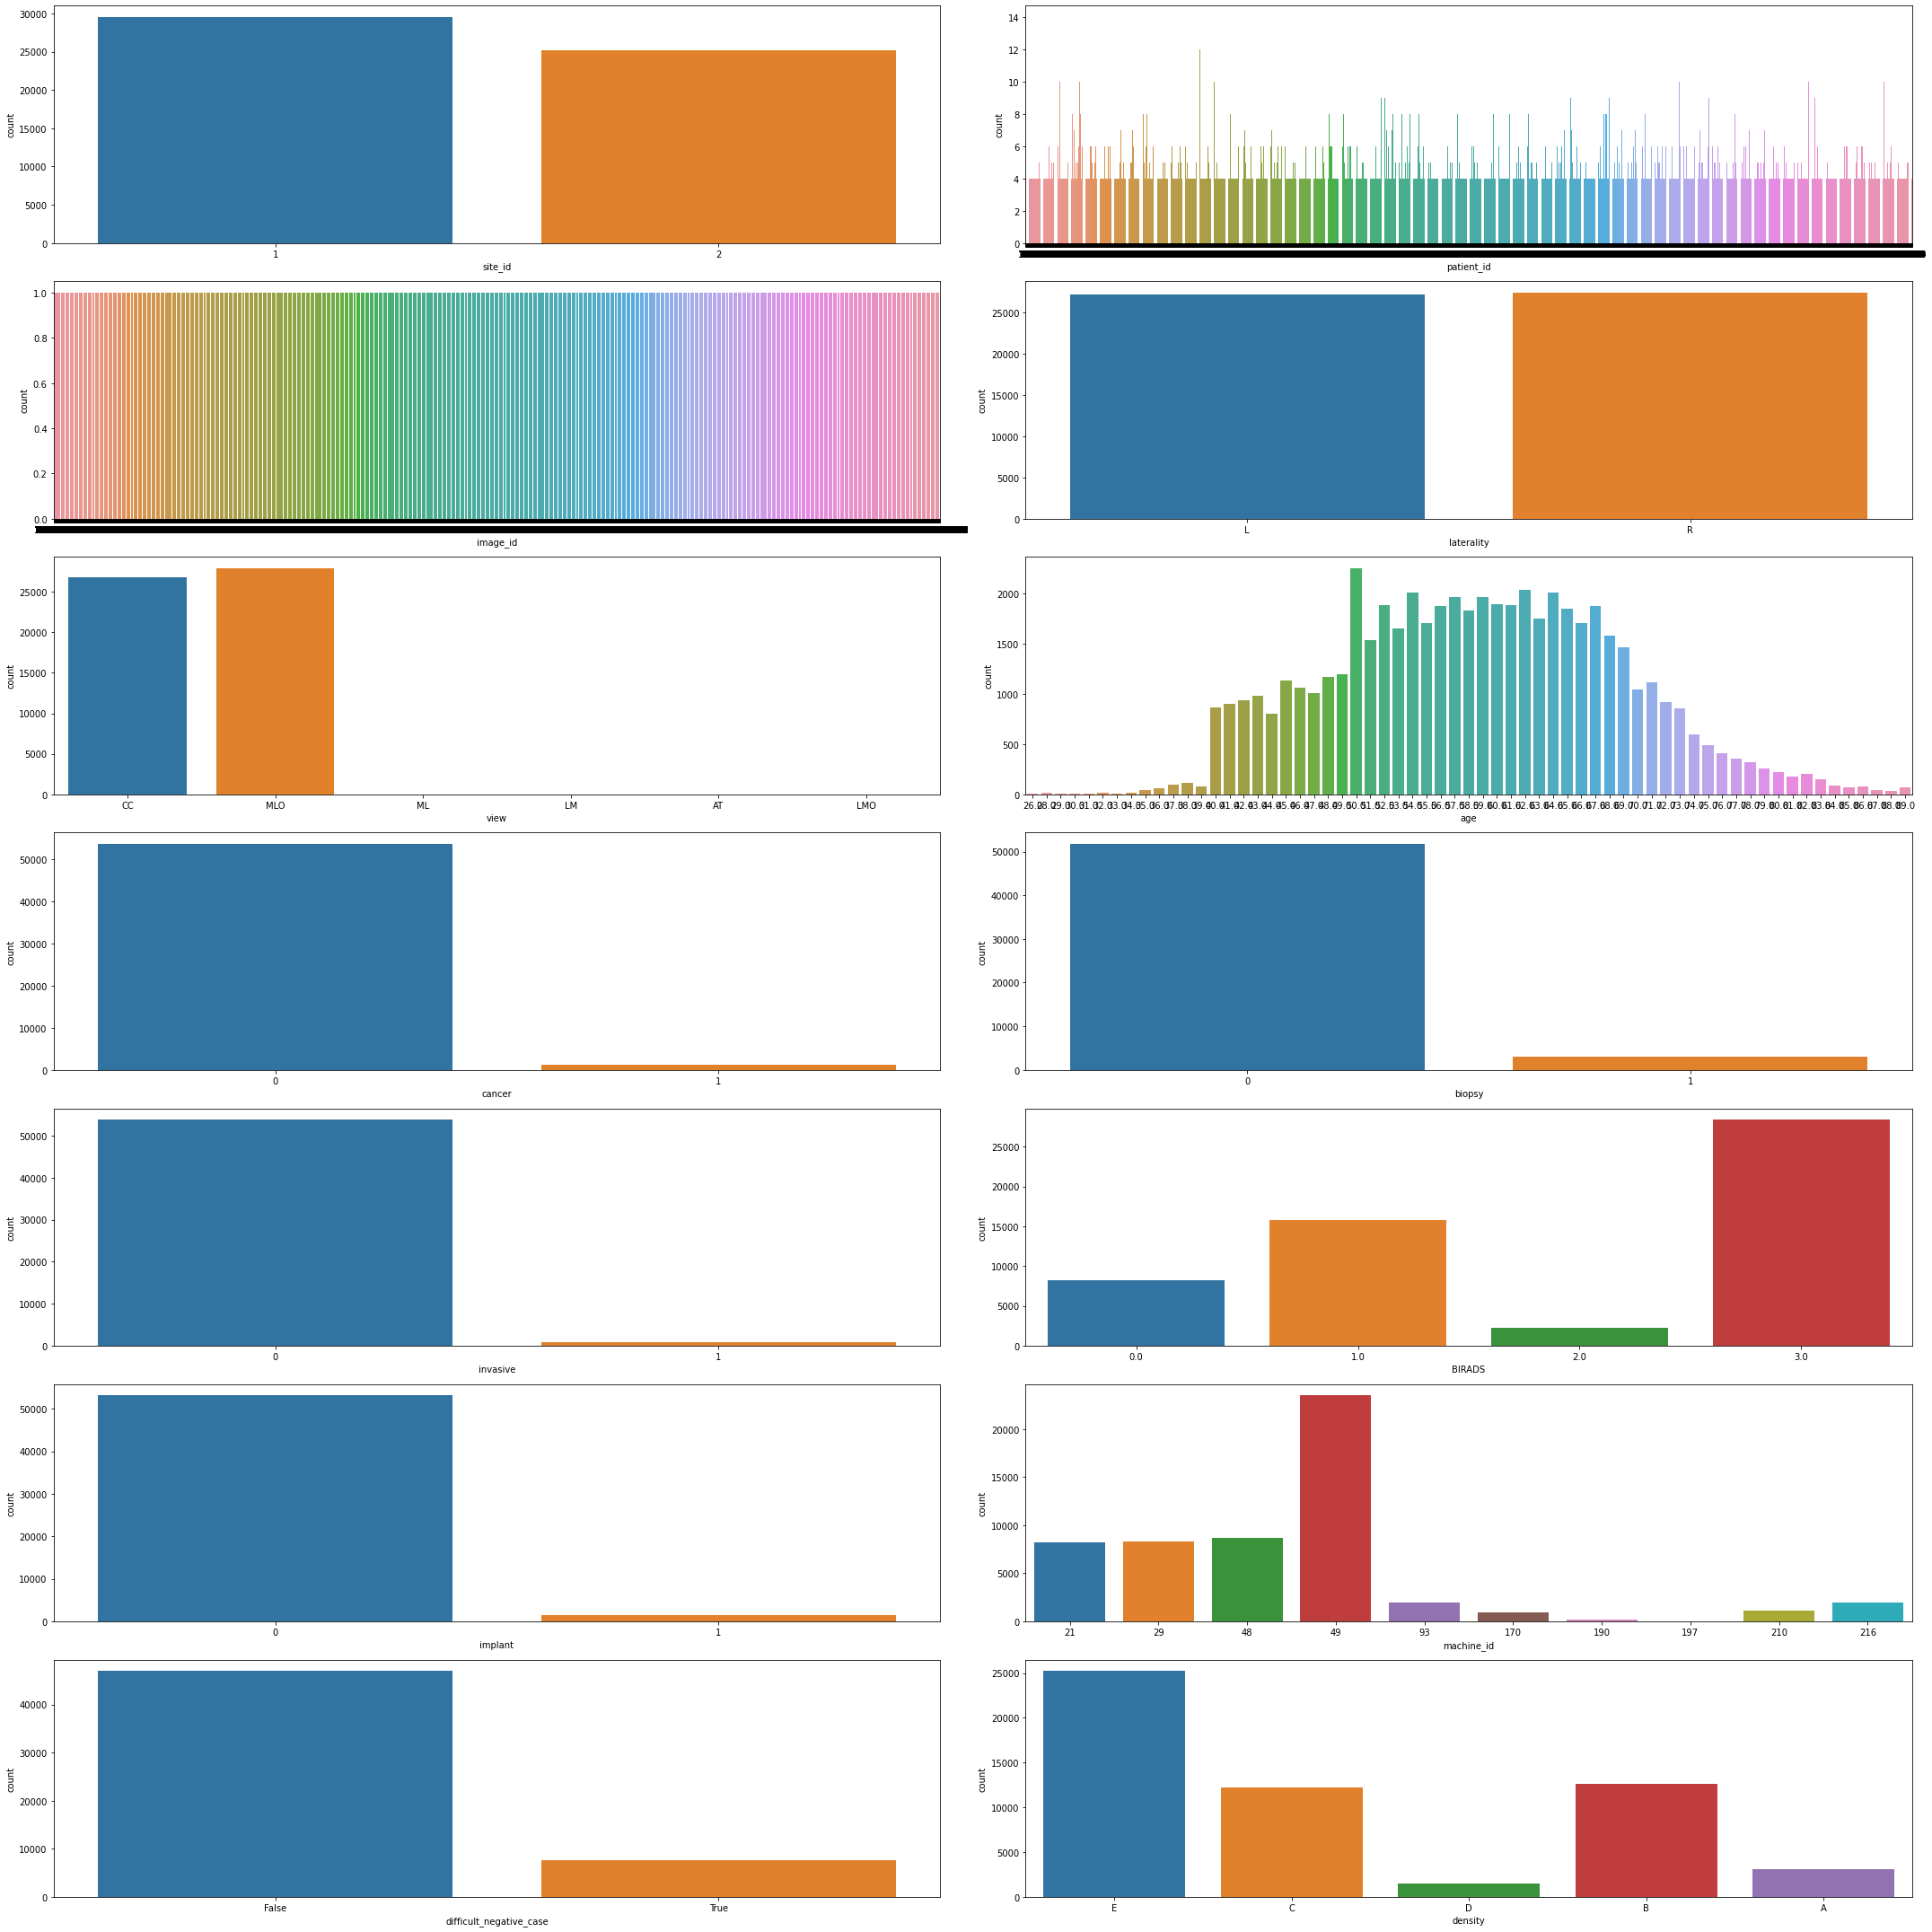

In [78]:
fig, axes = plt.subplots(7, 2, figsize=(30,30))

print(train_df.groupby('site_id').size())
sns.countplot(x='site_id', data=train_df, ax=axes[0][0])
print("-" * 40)
print(train_df.groupby('patient_id').size())
sns.countplot(x='patient_id', data=train_df, ax=axes[0][1])
print("-" * 40)
print(train_df.groupby('image_id').size())
sns.countplot(x='image_id', data=train_df, ax=axes[1][0])
print("-" * 40)
print(train_df.groupby('laterality').size())
sns.countplot(x='laterality', data=train_df, ax=axes[1][1])
print("-" * 40)
print(train_df.groupby('view').size())
sns.countplot(x='view', data=train_df, ax=axes[2][0])
print("-" * 40)
print(train_df.groupby('age').size())
sns.countplot(x='age', data=train_df, ax=axes[2][1])
print("-" * 40)
print(train_df.groupby('cancer').size())
sns.countplot(x='cancer', data=train_df, ax=axes[3][0])
print("-" * 40)
print(train_df.groupby('biopsy').size())
sns.countplot(x='biopsy', data=train_df, ax=axes[3][1])
print("-" * 40)
print(train_df.groupby('invasive').size())
sns.countplot(x='invasive', data=train_df, ax=axes[4][0])
print("-" * 40)
print(train_df.groupby('BIRADS').size())
sns.countplot(x='BIRADS', data=train_df, ax=axes[4][1])
print("-" * 40)
print(train_df.groupby('implant').size())
sns.countplot(x='implant', data=train_df, ax=axes[5][0])
print("-" * 40)
print(train_df.groupby('machine_id').size())
sns.countplot(x='machine_id', data=train_df, ax=axes[5][1])
print("-" * 40)
print(train_df.groupby('difficult_negative_case').size())
sns.countplot(x='difficult_negative_case', data=train_df, ax=axes[6][0])
print("-" * 40)
print(train_df.groupby('density').size())
sns.countplot(x='density', data=train_df, ax=axes[6][1])

plt.tight_layout()
plt.show()

In [12]:
print("site_1에서의 환자별 이미지 데이터 갯수: ",
    train_df[train_df['site_id']==1].groupby('patient_id').image_id.count().unique(),
    "\nsite_2에서의 환자별 이미지 데이터 갯수: ",
    train_df[train_df['site_id']==2].groupby('patient_id').image_id.count().unique())

site_1에서의 환자별 이미지 데이터 갯수:  [ 6  4  5  7 10  8  9 11 12 13 14] 
site_2에서의 환자별 이미지 데이터 갯수:  [4 5 6]


In [19]:
print("train image data와 train.csv 내 patient_id는 각각 모두 정보가 있다.")
print("train.csv의 환자 id 갯수: ", train_df.patient_id.nunique()) 
    #   ", train image의 환자 id 갯수: ",len(os.listdir(train_df)))

train image data와 train.csv 내 patient_id는 각각 모두 정보가 있다.
train.csv의 환자 id 갯수:  11913


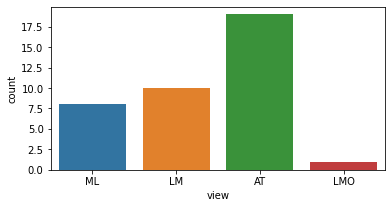

In [86]:
# view에서 CC와 MLO 제외한 부분에서의 데이터 갯수를 살펴보기. 
train_df=train_df[train_df.view.isin(['ML','LM','AT','LMO'])]
plt.figure(figsize=(6,3))
sns.countplot(data=train_df, x='view')
plt.show()

# 두 변수 간 상관 관계도 보기.

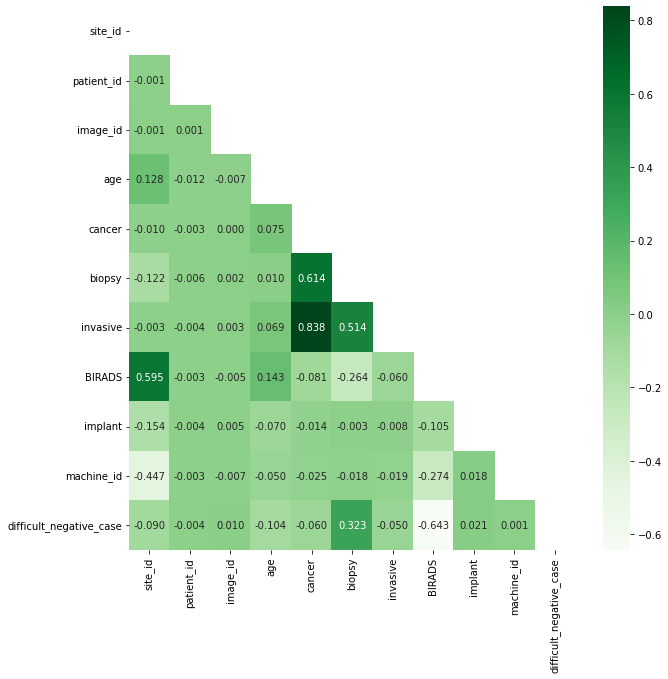

In [81]:
mask = np.zeros_like(train_df.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(data = train_df.corr(), mask=mask, annot=True, fmt = '.3f', linewidths=0, cmap='Greens')

# 상관관계도에서 
               cancer <-> invasive 살펴보니 양성에서 침습성이 크다. 
               
               cancer <-> biopsy
               
               biopsy <-> invasive
               
               site_id <-> BIRADS
               
               biopsy <-> difficult_negative_case


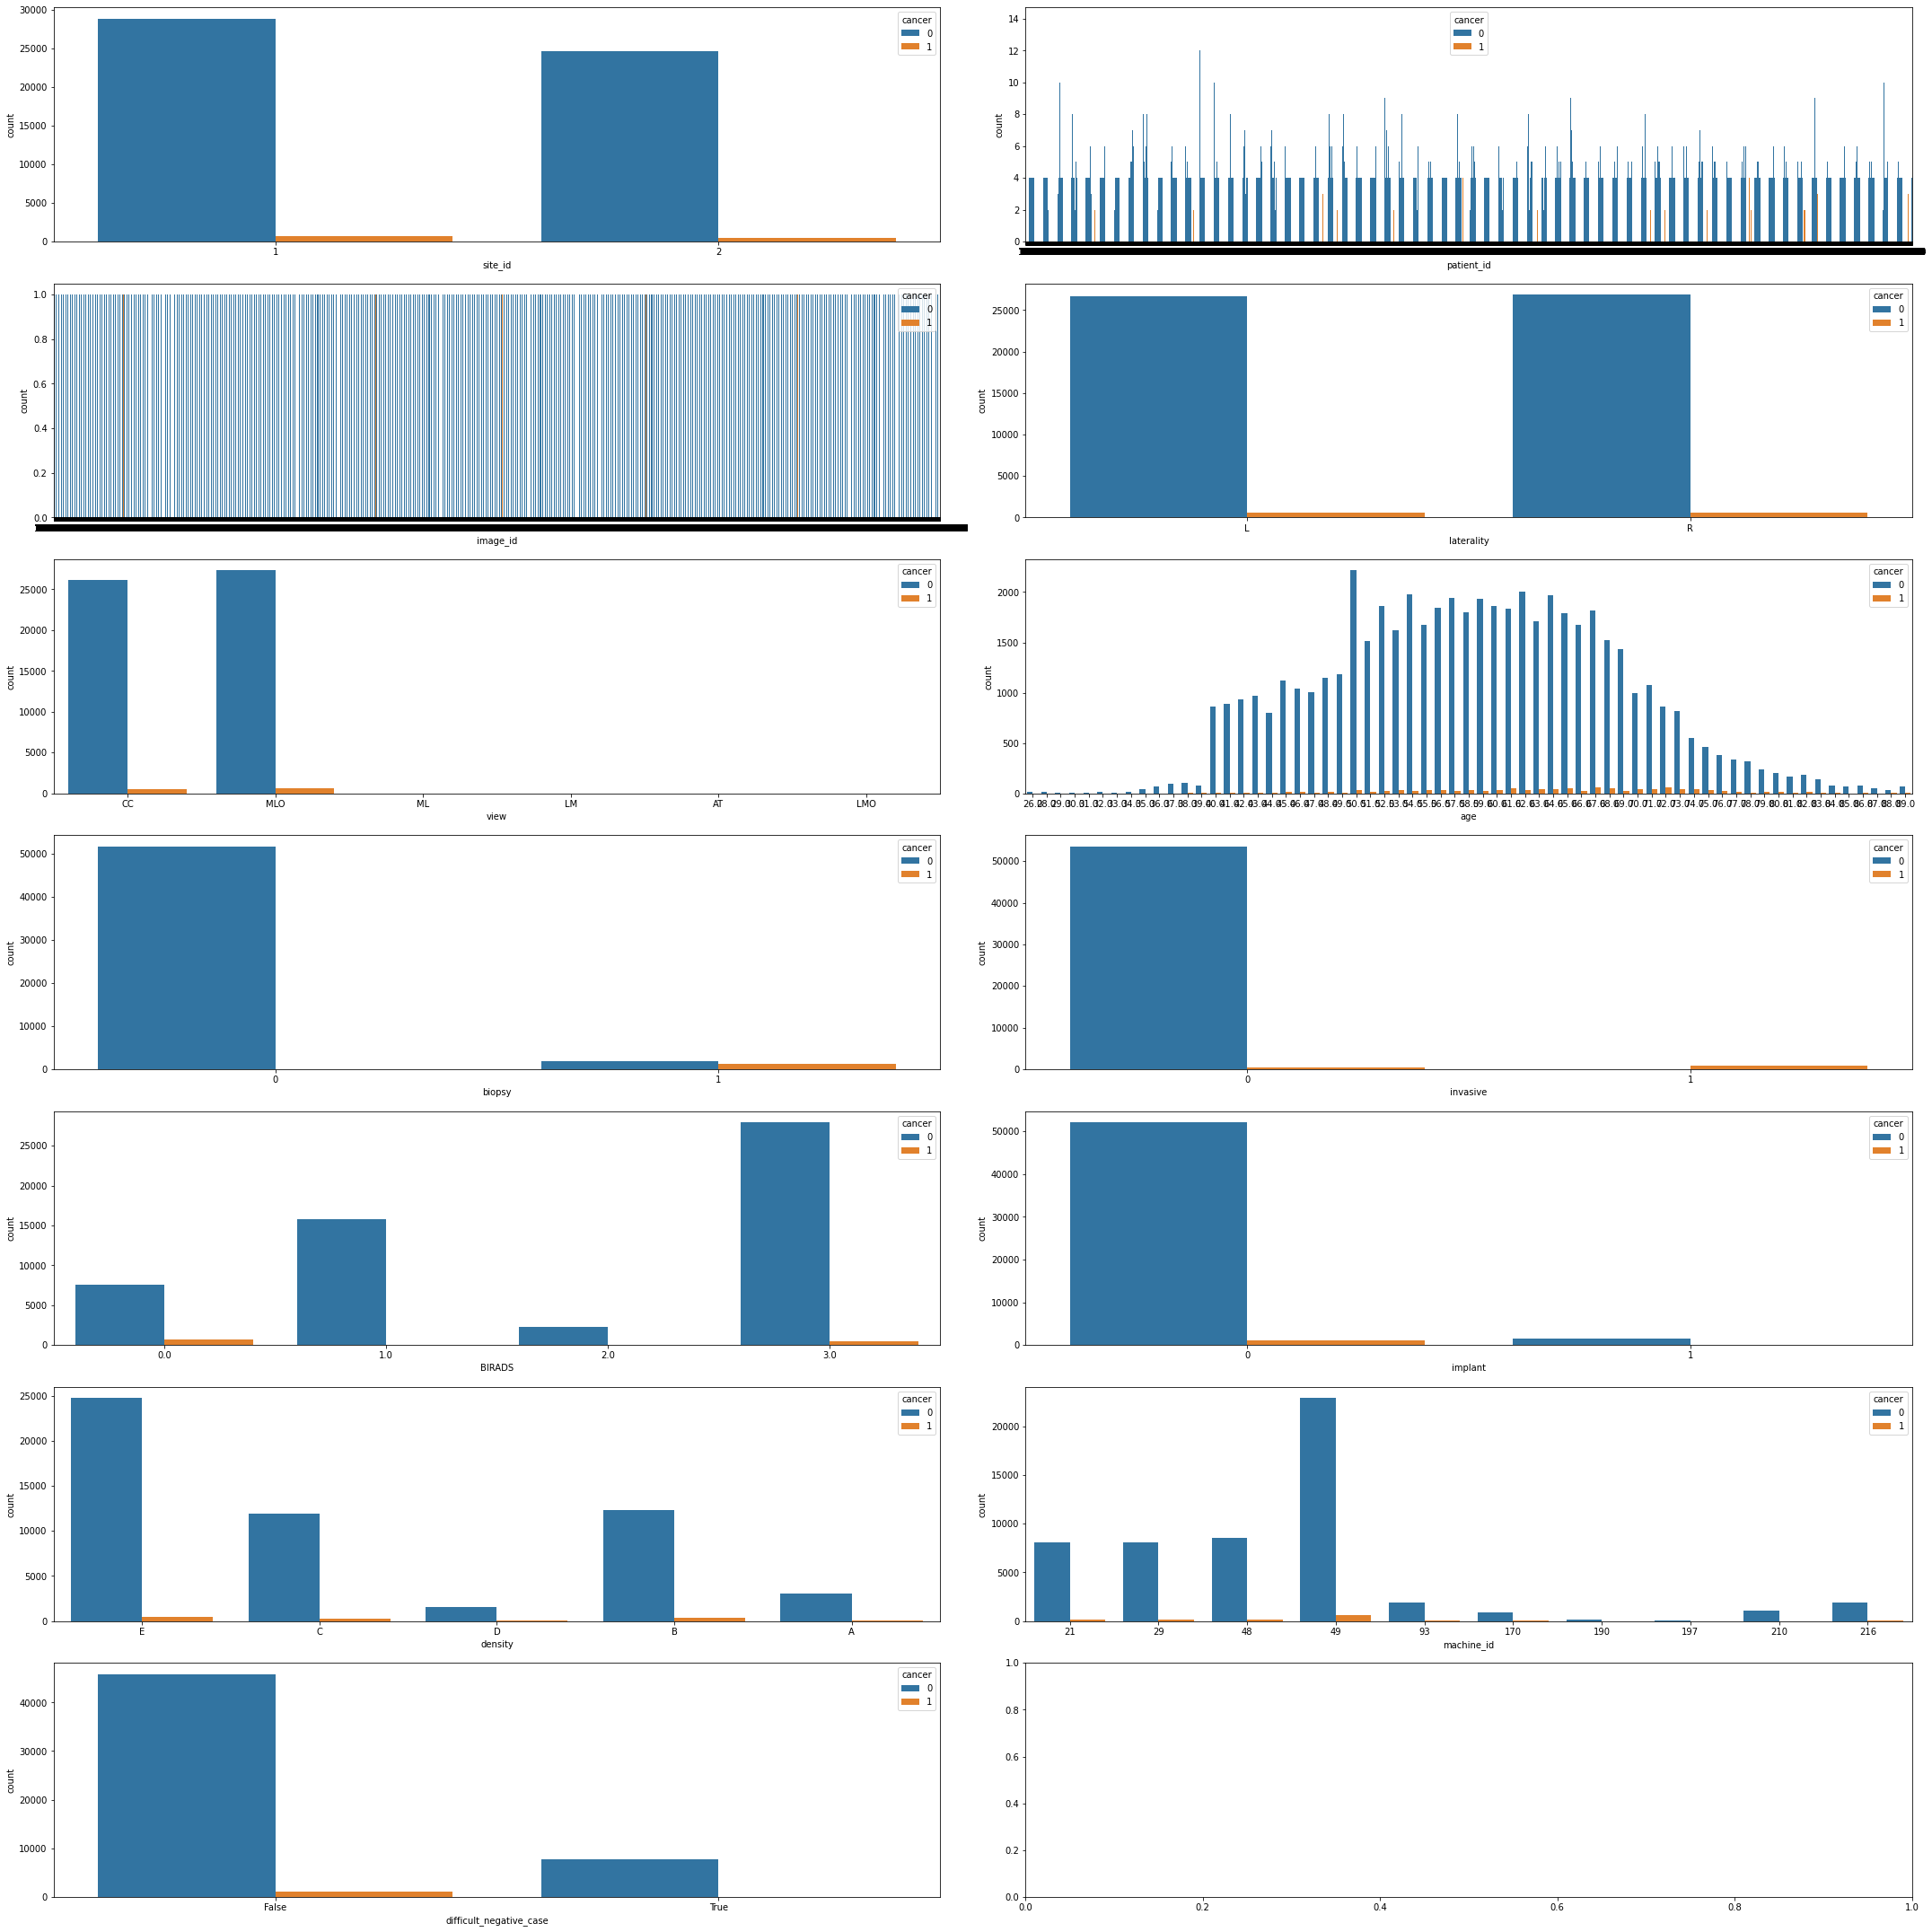

In [88]:
fig, axes = plt.subplots(7, 2, figsize=(30,30))

sns.countplot(data=train_df, x='site_id', hue='cancer', ax=axes[0][0])
sns.countplot(data=train_df, x='patient_id', hue='cancer', ax=axes[0][1])
sns.countplot(data=train_df, x='image_id', hue='cancer', ax=axes[1][0])
sns.countplot(data=train_df, x='laterality', hue='cancer', ax=axes[1][1])
sns.countplot(data=train_df, x='view', hue='cancer', ax=axes[2][0])
sns.countplot(data=train_df, x='age', hue='cancer', ax=axes[2][1])
sns.countplot(data=train_df, x='biopsy', hue='cancer', ax=axes[3][0])
sns.countplot(data=train_df, x='invasive', hue='cancer', ax=axes[3][1])
sns.countplot(data=train_df, x='BIRADS', hue='cancer', ax=axes[4][0])
sns.countplot(data=train_df, x='implant', hue='cancer', ax=axes[4][1])
sns.countplot(data=train_df, x='density', hue='cancer', ax=axes[5][0])
sns.countplot(data=train_df, x='machine_id', hue='cancer', ax=axes[5][1])
sns.countplot(data=train_df, x='difficult_negative_case', hue='cancer', ax=axes[6][0])

plt.tight_layout()
plt.show()

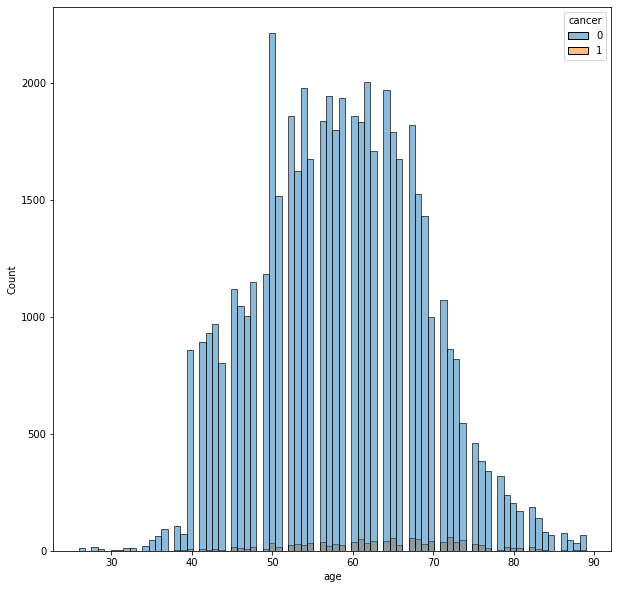

In [82]:
plt.figure(figsize=(8,8))
sns.histplot(data=train_df, x='age', hue='cancer')
plt.show()

In [137]:
# 각 열의 비율을 찾는 코드
# cancer의 양성과 음성의 비율을 찾아보기. 
var_rate_info = dict()
# cc_idx=0
# cc_per=0
for i in range(len(train_df.cancer.value_counts())):
    var_idx = train_df.cancer.value_counts().index[i]
    var_per = train_df.cancer.value_counts().values[i]/train_df.cancer.value_counts().values.sum()*100
    var_rate_info[var_idx] = var_per  # 이코드는 딕션어리 문법에서 추가하는 것이다. 위에 var_rate_info = dict() 여기에 모아두는 것이다. 
    
print("cancer의 양/음성 비율은, ", var_rate_info)



cancer의 양/음성 비율은,  {0: 97.8832303586444, 1: 2.11676964135561}


density  invasive
A        0            30.71
         1             0.34
B        0           124.45
         1             2.06
C        0           119.77
         1             1.98
D        0            15.27
         1             0.12
E        0           248.68
         1             3.68
dtype: float64


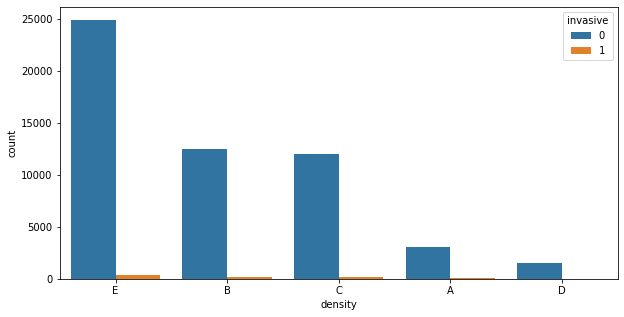

In [49]:
print(train_df.groupby(['density','invasive']).size().div(100))
plt.figure(figsize=(10,5))
sns.countplot(data=train_df, x='density', hue='invasive', order=["E","B", "C", "A", "D"])
plt.show()

density  implant
A        0           30.22
         1            0.83
B        0          121.94
         1            4.57
C        0          113.19
         1            8.56
D        0           14.75
         1            0.64
E        0          252.19
         1            0.17
dtype: float64


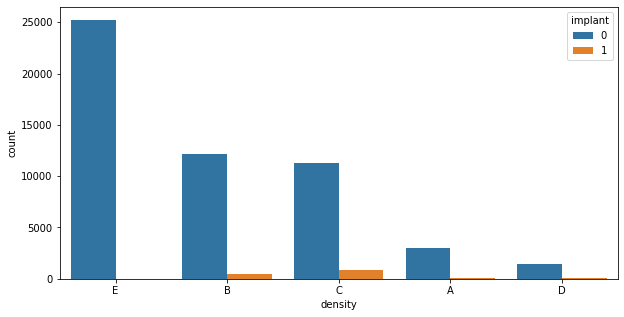

In [50]:
print(train_df.groupby(['density','implant']).size().div(100))
plt.figure(figsize=(10,5))
sns.countplot(data=train_df, x='density', hue='implant',order=["E","B", "C", "A", "D"])
plt.show()

invasive  implant
0         0          524.24
          1           14.64
1         0            8.05
          1            0.13
dtype: float64


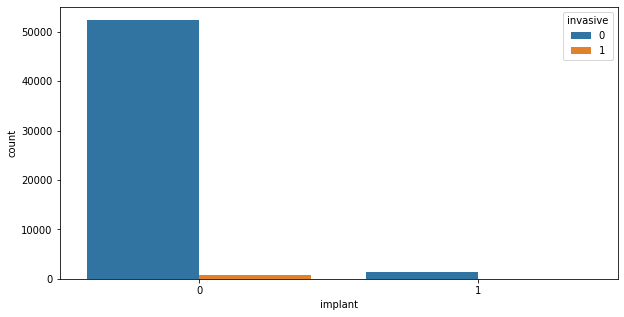

In [53]:
print(train_df.groupby(['invasive','implant']).size().div(100))
plt.figure(figsize=(10,5))
sns.countplot(data=train_df, x='implant', hue='invasive')
plt.show()

In [58]:
print(train_df.groupby(['implant','invasive', "density", "cancer"]).size().div(100))

implant  invasive  density  cancer
0        0         A        0          29.69
                            1           0.19
                   B        0         118.94
                            1           1.03
                   C        0         110.46
                            1           0.79
                   D        0          14.50
                            1           0.13
                   E        0         247.25
                            1           1.26
         1         A        1           0.34
                   B        1           1.97
                   C        1           1.94
                   D        1           0.12
                   E        1           3.68
1        0         A        0           0.83
                   B        0           4.48
                   C        0           8.52
                   D        0           0.64
                   E        0           0.17
         1         B        1           0.09
                   C

In [61]:
print(train_df.groupby(['invasive', "density", "cancer"]).size().div(100))

invasive  density  cancer
0         A        0          30.52
                   1           0.19
          B        0         123.42
                   1           1.03
          C        0         118.98
                   1           0.79
          D        0          15.14
                   1           0.13
          E        0         247.42
                   1           1.26
1         A        1           0.34
          B        1           2.06
          C        1           1.98
          D        1           0.12
          E        1           3.68
dtype: float64


- 픽처 선택할때 implant는 빼자. 두 데이터 비교 분석했을때 큰 영향을 미치지 않음.

In [62]:
print(train_df.groupby(['biopsy','invasive', "BIRADS", "difficult_negative_case"]).size().div(100))


biopsy  invasive  BIRADS  difficult_negative_case
0       0         0.0     True                        58.94
                  1.0     False                      157.72
                  2.0     False                       22.65
                  3.0     False                      278.06
1       0         0.0     False                        2.14
                          True                        16.91
                  3.0     False                        1.26
                          True                         1.20
        1         0.0     False                        4.50
                  3.0     False                        3.68
dtype: float64


In [66]:
train_df["age"].value_counts()

50.0    2248
62.0    2038
64.0    2011
54.0    2004
57.0    1964
        ... 
26.0      11
33.0      10
29.0       7
30.0       5
31.0       4
Name: age, Length: 63, dtype: int64

machine_id  cancer
21          0          80.67
            1           1.54
29          0          81.06
            1           1.61
48          0          85.20
            1           1.79
49          0         229.15
            1           6.14
93          0          19.01
            1           0.14
170         0           9.00
            1           0.23
190         0           1.40
            1           0.05
197         0           0.29
210         0          10.70
216         0          19.00
            1           0.08
dtype: float64


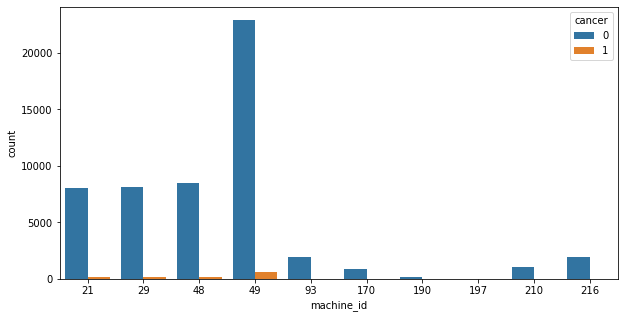

In [67]:
print(train_df.groupby(['machine_id','cancer']).size().div(100))
plt.figure(figsize=(10,5))
sns.countplot(data=train_df, x='machine_id', hue='cancer')
plt.show()

implant  cancer
0        0         52084
         1          1145
1        0          1464
         1            13
Name: patient_id, dtype: int64


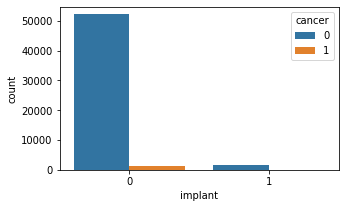

In [62]:
print(train_df.groupby(['implant','cancer']).patient_id.size())
plt.figure(figsize=(5,3))
sns.countplot(data=train_df, x='implant', hue='cancer')
plt.show()

양성인 경우만 0. 지속적인 진료가 필요하다.


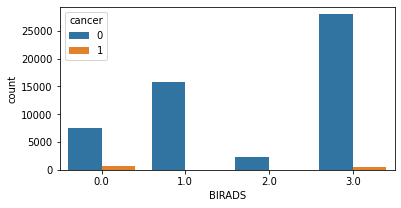

In [61]:
print("양성인 경우만 0. 지속적인 진료가 필요하다.")
plt.figure(figsize=(6,3))
sns.countplot(data=train_df, x='BIRADS', hue='cancer')
plt.show()

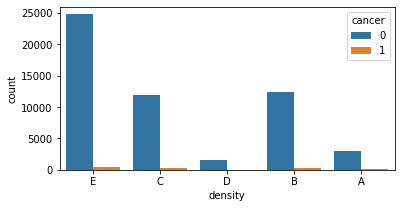

In [60]:
plt.figure(figsize=(6,3))
sns.countplot(data=train_df, x='density', hue='cancer')
plt.show()

음성인 경우 invasive가 양성으로 나온적은 없다.


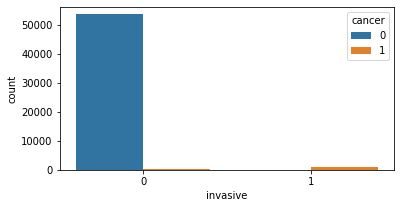

In [59]:
print("음성인 경우 invasive가 양성으로 나온적은 없다.")
plt.figure(figsize=(6,3))
sns.countplot(data=train_df, x='invasive', hue='cancer')
plt.show()

In [76]:
train_df[train_df['cancer']==0]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,3.0,0,E,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,3.0,0,E,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,3.0,0,E,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,3.0,0,E,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,E,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,3.0,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,3.0,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


cancer이 양성인 경우- invasive인지 아닌지 


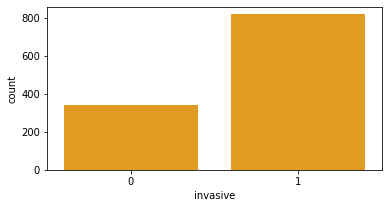

In [78]:
print("cancer이 양성인 경우- invasive인지 아닌지 ")
plt.figure(figsize=(6,3))
sns.countplot(data=train_df[train_df['cancer']==1], x='invasive', color='orange')
plt.show()

cancer 양성인 경우, ML, LM, LMO는 존재하지 않았다.


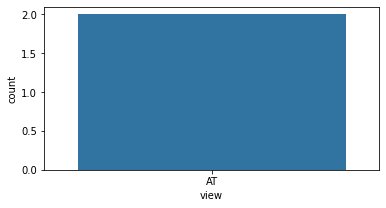

In [90]:
print("cancer 양성인 경우, ML, LM, LMO는 존재하지 않았다.")
plt.figure(figsize=(6,3))
sns.countplot(data=train_df[train_df['cancer']==1], x='view')
plt.show()

음성인 경우 전체 데이터와 그래프가 비슷하다.


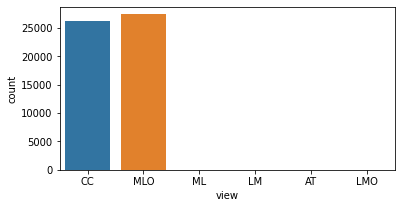

In [21]:
print("음성인 경우: CC, MLO에서 많이 발견 되었다.")
plt.figure(figsize=(6,3))
sns.countplot(data=train_df[train_df['cancer']==0], x='view')
plt.show()

cancer  view
0       MLO     273.13
        CC      261.99
1       MLO       5.90
        CC        5.66
0       AT        0.17
        LM        0.10
        ML        0.08
1       AT        0.02
0       LMO       0.01
dtype: float64


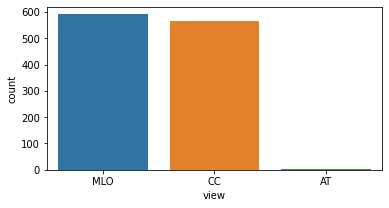

In [40]:
print(train_df.groupby(['cancer', "view"]).size().div(100).sort_values(ascending=False))
plt.figure(figsize=(6,3))
sns.countplot(data=train_df[train_df['cancer']==1], x='view')
plt.show()

laterality  cancer
R           0         268.69
L           0         266.79
            1           5.88
R           1           5.70
dtype: float64


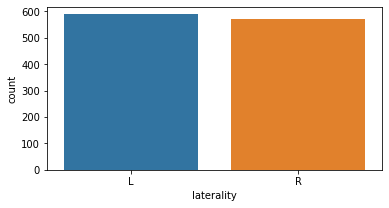

In [44]:
print(train_df.groupby(['laterality', "cancer"]).size().div(100).sort_values(ascending=False))
plt.figure(figsize=(6,3))
sns.countplot(data=train_df[train_df['cancer']==1], x='laterality')
plt.show()

invasive  age 
0         50.0    22.24
          62.0    20.21
          54.0    19.88
          64.0    19.84
          57.0    19.53
                  ...  
1         42.0     0.02
          44.0     0.02
          47.0     0.02
          84.0     0.02
          89.0     0.02
Length: 112, dtype: float64


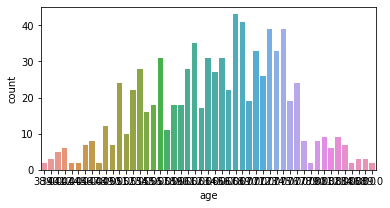

In [55]:
print(train_df.groupby(['invasive', "age"]).size().div(100).sort_values(ascending=False))
plt.figure(figsize=(6,3))
sns.countplot(data=train_df[train_df['invasive']==1], x='age')
plt.show()

invasive  age 
0         50.0    22.24
          62.0    20.21
          54.0    19.88
          64.0    19.84
          57.0    19.53
                  ...  
1         42.0     0.02
          44.0     0.02
          47.0     0.02
          84.0     0.02
          89.0     0.02
Length: 112, dtype: float64


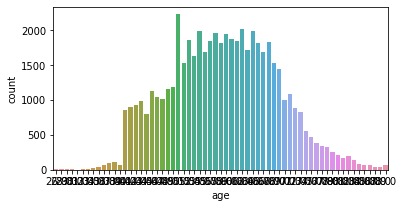

In [58]:
print(train_df.groupby(['invasive', "age"]).size().div(100).sort_values(ascending=False))
plt.figure(figsize=(6,3))
sns.countplot(data=train_df[train_df['invasive']==0], x='age')
plt.show()

laterality  view
L           MLO     139.58
R           MLO     139.45
            CC      134.70
L           CC      132.95
R           AT        0.12
L           AT        0.07
R           LM        0.06
            ML        0.05
L           LM        0.04
            ML        0.03
R           LMO       0.01
dtype: float64


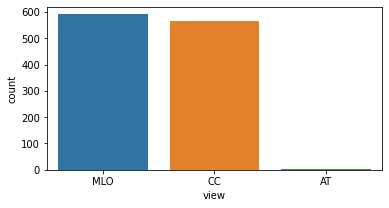

In [45]:
print(train_df.groupby(['laterality', "view"]).size().div(100).sort_values(ascending=False))
plt.figure(figsize=(6,3))
sns.countplot(data=train_df[train_df['cancer']==1], x='view')
plt.show()

In [42]:
print("암이 음성인 경우 ")
print(train_df[train_df.cancer==0].age.describe())
print("-"*40)
print("암이 양성인 경우 ")
print(train_df[train_df.cancer==1].age.describe())
print("결론","-"*30)
print("cancer가 양성인 경우 median값이 더 높다 (56, 65)")

암이 음성인 경우 
count    53548.000000
mean        58.433891
std         10.019831
min         26.000000
25%         51.000000
50%         58.000000
75%         66.000000
max         89.000000
Name: age, dtype: float64
----------------------------------------
암이 양성인 경우 
count    1158.000000
mean       63.678756
std         9.991980
min        38.000000
25%        56.000000
50%        64.500000
75%        71.000000
max        89.000000
Name: age, dtype: float64
결론 ------------------------------
cancer가 양성인 경우 median값이 더 높다 (56, 65)


In [63]:
print("density value count")
print(train_df.density.value_counts())
print("-"*40)
print("cancer 양성인 경우 density value count")
print(train_df[train_df['cancer']==1].density.value_counts())
print("-"*40)
print("cancer 음성인 경우 density value count")
print(train_df[train_df['cancer']==0].density.value_counts())


density value count
E    25236
B    12651
C    12175
A     3105
D     1539
Name: density, dtype: int64
----------------------------------------
cancer 양성인 경우 density value count
E    494
B    309
C    277
A     53
D     25
Name: density, dtype: int64
----------------------------------------
cancer 음성인 경우 density value count
E    24742
B    12342
C    11898
A     3052
D     1514
Name: density, dtype: int64


# EDA 결과

1. 유방암은 50~60대에 빈번히 많이 발생한다.

2. implant, machine_id, difficult_negative_case는 feature에서 뺀다. 이유는 cancer EDA 하는 과정에 크게 영향이 없다고 데이터 분석에 나옴.

3. biopsy와 BIRADS만 EDA 하고 바로 feature 작업 및 이미지 모델링으로 진행. = 

In [ ]:
# 분석에서 제외

train_desc = train.describe().transpose()
train_desc[train_desc['std']==0].index

Index(['vehicle_restricted', 'height_restricted'], dtype='object')